In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [0]:
cursos = pd.read_csv('http://dados.ufrn.br/dataset/02526b96-cf40-4507-90b0-3afe5ddd53e7/resource/a10bc434-9a2d-491a-ae8c-41cf643c35bc/download/cursos-de-graduacao.csv', sep=';', usecols = ['id_curso', 'nome', 'area_conhecimento'])
cursos = cursos.drop_duplicates(subset='nome', keep="first")
cursos.at[2, 'area_conhecimento'] = 'Ciências Exatas e da Terra'

In [0]:
discentes = dict()
discentes['2019'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/a55aef81-e094-4267-8643-f283524e3dd7/download/discentes-2019.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
#discentes['2018'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/146b749b-b9d0-49b2-b114-ac6cc82a4051/download/discentes-2018.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
#discentes['2017'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dc732572-a51a-4d4a-a39d-2db37cbe5382/download/discentes-2017.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
discentes['2016'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
#discentes['2015'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
#discentes['2014'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
#discentes['2013'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dba208c2-822f-4e26-adc3-b61d4cb110b6/download/discentes-2013.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
discentes['2012'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/fc283aa9-61a7-4cf0-91fb-c403c0817b48/download/discentes-2012.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
#discentes['2011'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/2bb3dec9-7f23-434c-a179-21515f91abc8/download/discentes-2011.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
#discentes['2010'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/5fc61f78-19b4-4020-9f3c-c298cb8a63aa/download/discentes-2010.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])
#discentes['2009'] = pd.read_csv('http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/861b96a8-5304-4e6a-a8c4-068533ec7cb9/download/discentes-2009.csv', sep=';', usecols = ['matricula', 'sexo', 'raca', 'status', 'sigla_nivel_ensino', 'id_curso'])

In [0]:
def generate_plot(df, year):
  aux = df.drop(columns=['raca', 'status', 'sigla_nivel_ensino'], axis=1)
  aux = pd.merge(df, cursos, on='id_curso').drop(columns=['id_curso','raca', 'status', 'sigla_nivel_ensino','nome'], axis=1)
  #aux.rename(columns={'nome':'nome_curso'}, inplace=True)
  counts = aux.groupby(['area_conhecimento', 'sexo']).count().unstack(fill_value=0).stack()
  totals = counts.sum(level=0)
  counts = counts.unstack(level=1)
  counts.columns = counts.columns.droplevel(level=0)
  sum = counts['F'] + counts['M']
  counts['F'] = (counts['F']/sum) * 100
  counts['M'] = (counts['M']/sum) * 100
  
  for key, value in counts.items():
    value = value.fillna(0)  
  
  counts.rename(columns={'F':'MULHERES', 'M':'HOMENS'}, inplace=True)
  counts=counts.reindex(columns=['HOMENS','MULHERES'])
  counts.sort_values(by=['MULHERES'], inplace=True)
  
  ax = counts.plot.barh(stacked=True, figsize=(30,15))
  ax.set_title('SEXO NAS ÁREAS DE CONHECIMENT0 DA UFRN EM ' + year)
  ax.xaxis.set_major_formatter(mtick.PercentFormatter())
  fig = ax.get_figure()
  fig.tight_layout()
  fig.savefig('sexo_output_' + year + '.png')

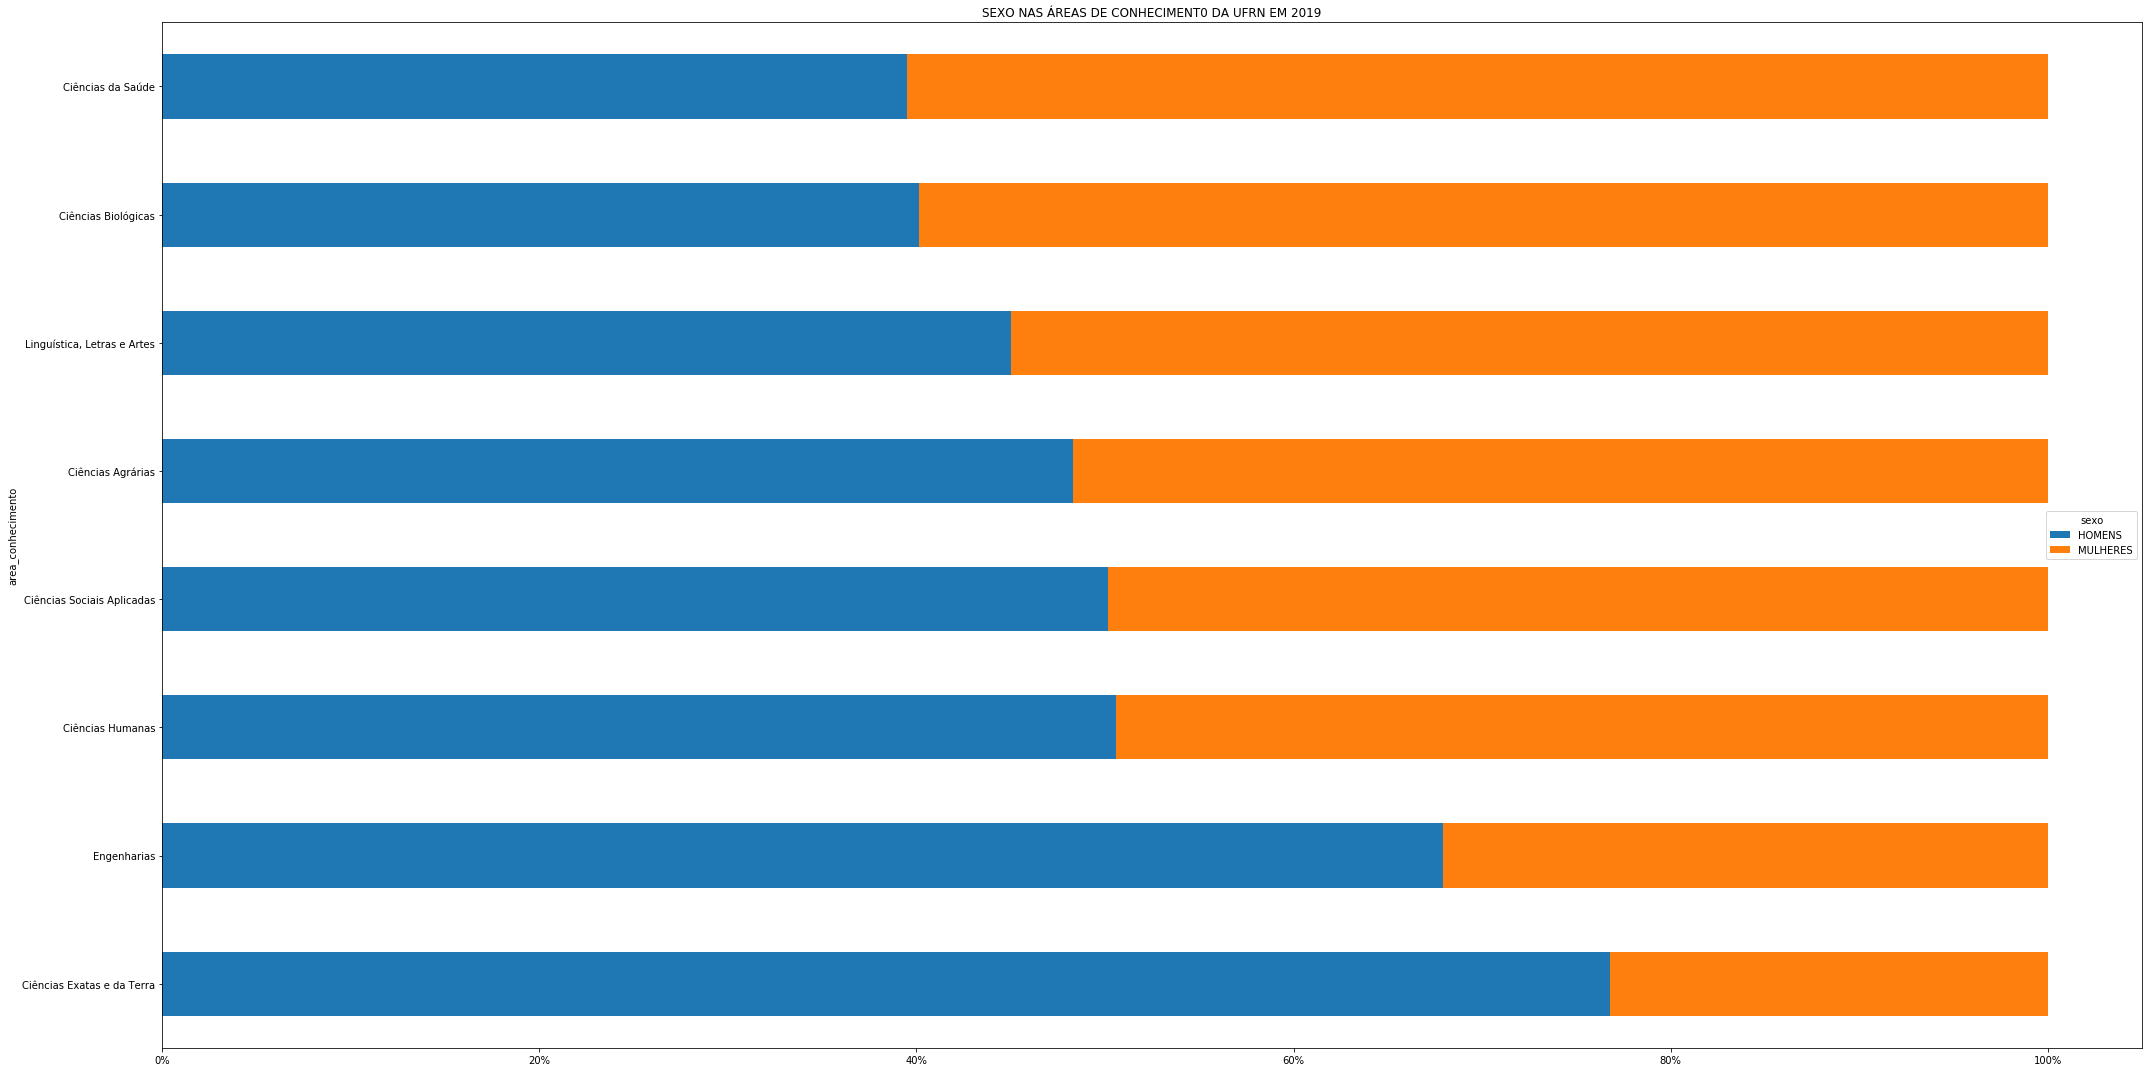

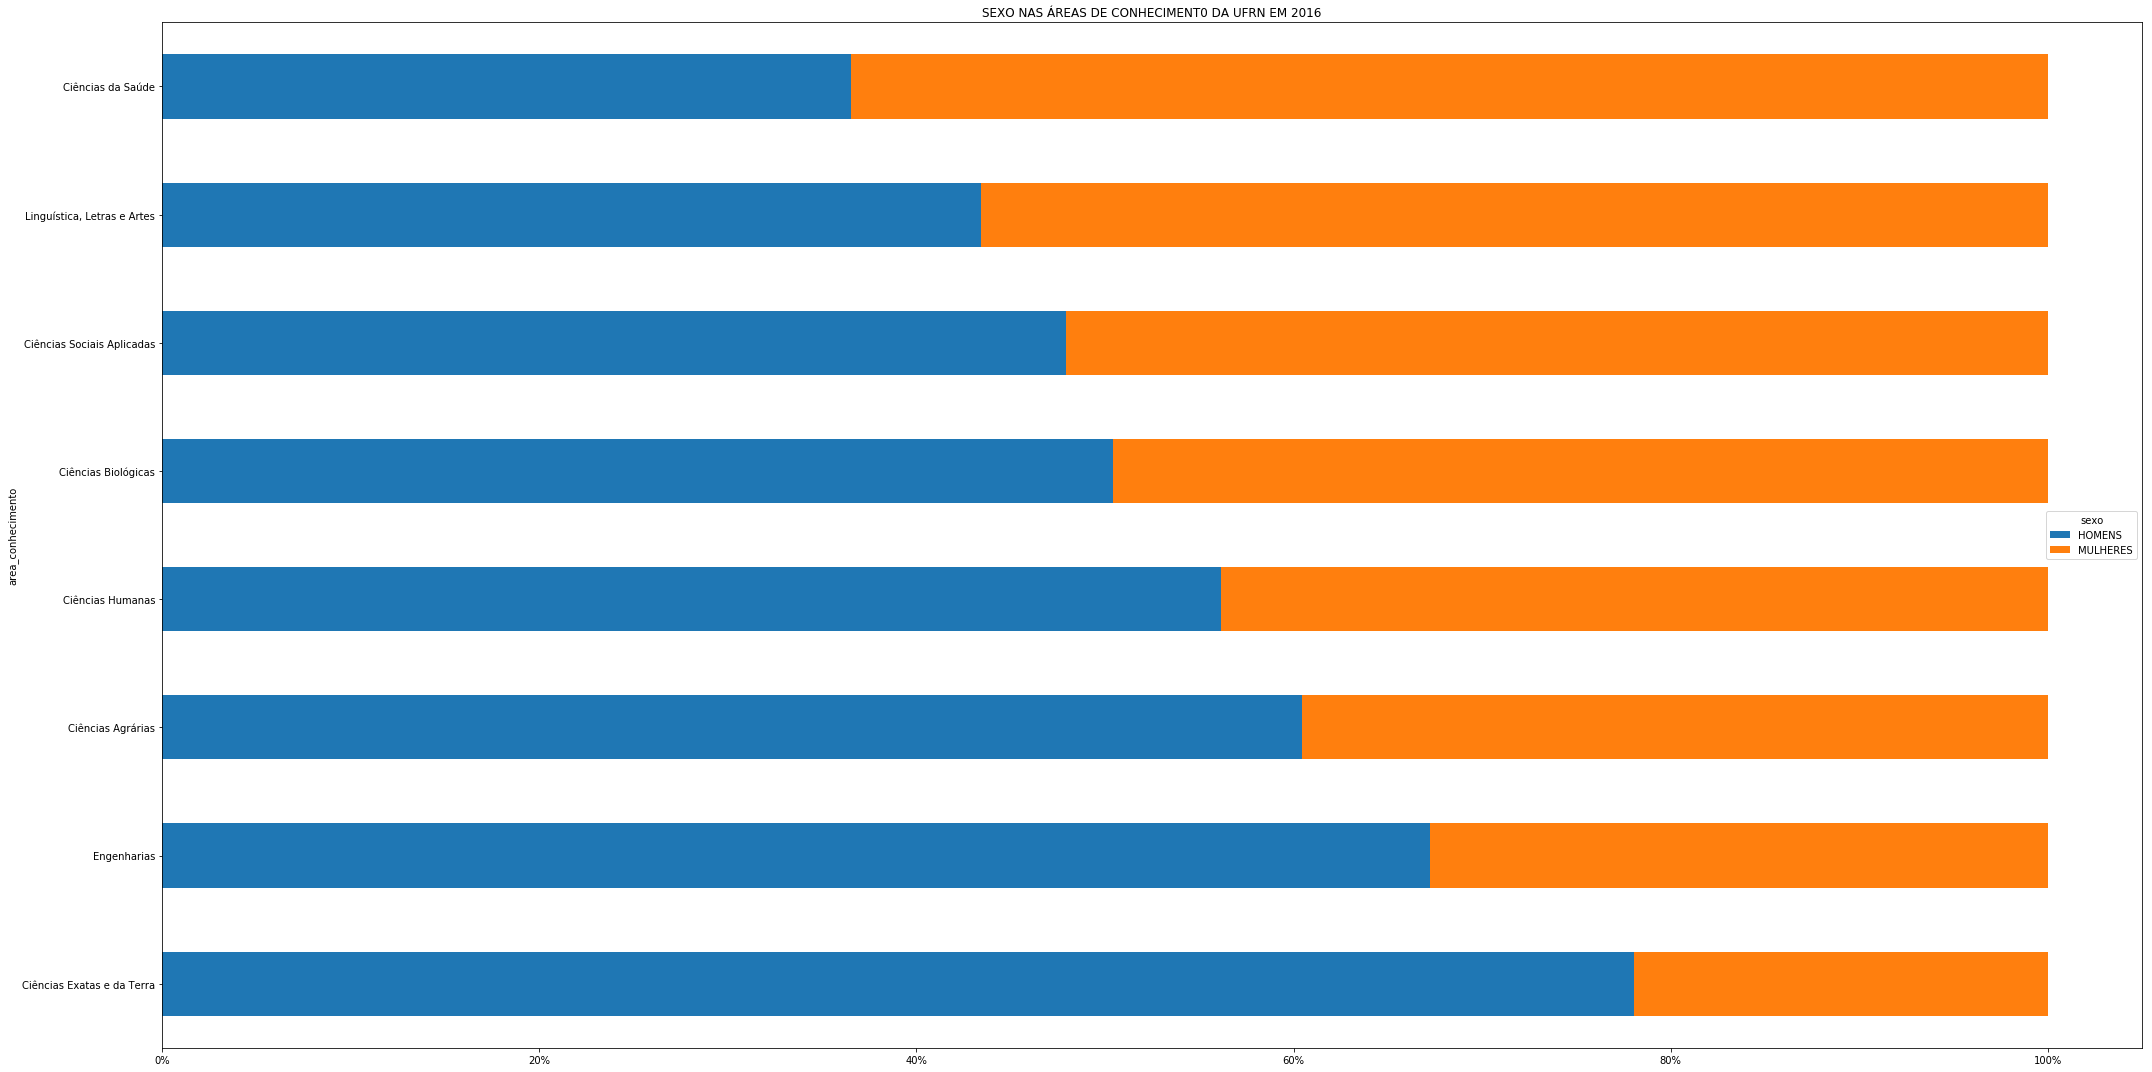

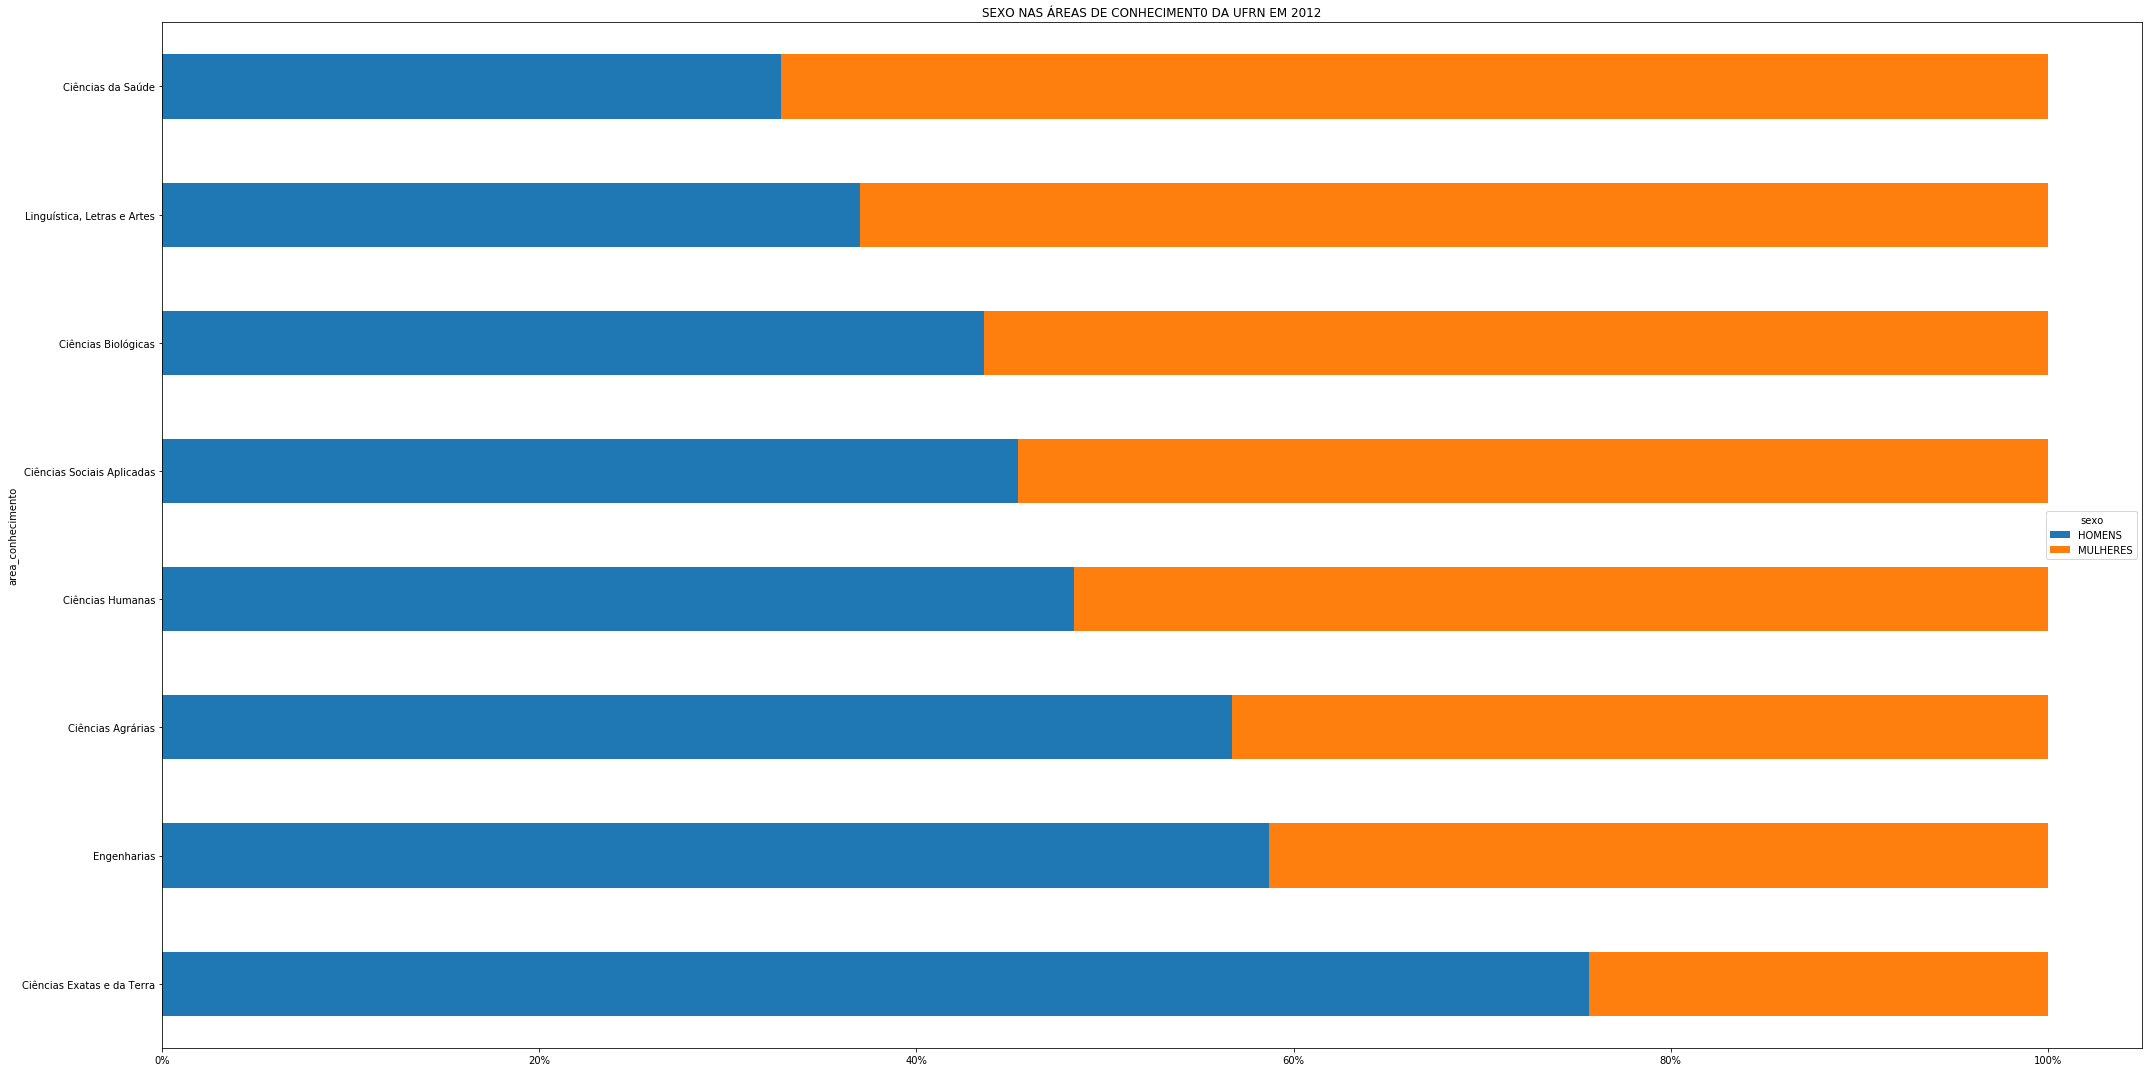

In [5]:
for year, df in discentes.items():
  df = df.fillna(0)
  df['id_curso'] = df['id_curso'].astype(int)
  alunos_aux = (np.isin(df.status, ['ATIVO', 'CONCLUIDO', 'ATIVO - FORMANDO'])) & (df.sigla_nivel_ensino == 'G') 
  discentes[year] = df.loc[alunos_aux]
  generate_plot(df, year)